1. Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


Прокурор неправ в том, что считает совершение преступления и группу крови зависимыми событиями. В любой ситуации — виновен подсудимый или нет — его шанс на эту группу крови 1%. Значит обвинение некорректно. К тому же прокурор, видимо, руководствуется априорной вероятностью, если любая улика хоть как-то намекает на вину подсудимого, прокурор считает его виновным с высокой вероятностью. Прокурор должен оценить вероятности независимых событий.

2. Затем выходит адвокат, объясняет ошибки прокурора, а сам говорит следующее: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Укажите, какие вероятности он оценил, а какие должен был оценить.

Адвокат сначала верно говорит о том, что такая же группа крови есть у 10 000 человек, и тут он должен был продолжить, что вероятность вины равна 1%, так как события независимы, но он получает вероятность 0.01%, взяв 1% от 10 000 человек.Он воспринял ситуацию, как два зависимых события: 1) кровь принадлежит человеку с особой группой, 2) обвиняемый один из особенных - 1%*1% от миллиона жителей города. Это тоже некорректно. Адвокат тоже должен был руководствоваться независимыми событиями и сказать, что обвиняемый виновен с вероятностью 1%.

3. Вернёмся к тесту на коронавирус из лекции. Напомню, что коронавирусом по нашему предположению болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста на коронавирус. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт позитивный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорных вероятностей болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

**Уменьшаем число false positives**

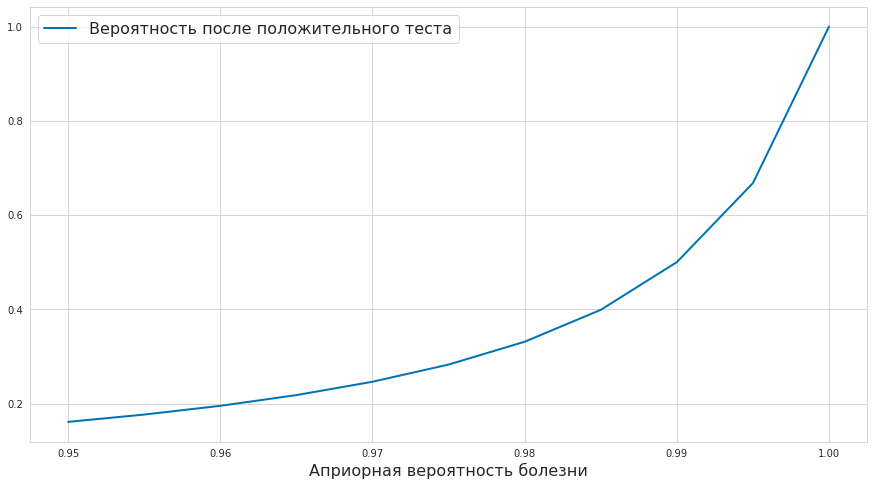

In [ ]:
def compute_posterior(data, prior_prob=0.01, test_success=0.95):
    if data == 1:
        return (prior_prob * test_success) / (prior_prob * test_success + (1-prior_prob) * (1-test_success))
    elif data == 0:
        return (prior_prob * (1-test_success)) / (prior_prob * (1-test_success) + (1-prior_prob) * test_success)
    else:
        return None

vector_posterior = np.vectorize(compute_posterior, excluded=['data', 'prior_prob'])
xs = np.arange(0.95, 1.005, 0.005)
ys_one = vector_posterior(1, test_success=xs)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys_one, linewidth=2, label='Вероятность после положительного теста')
# ax.set_xlim((0.0, 0.3))
ax.set_xlabel('Априорная вероятность болезни', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)
# fig.savefig('intro1.pdf', bbox_inches='tight')
plt.show()

**Уменьшаем число false negatives**

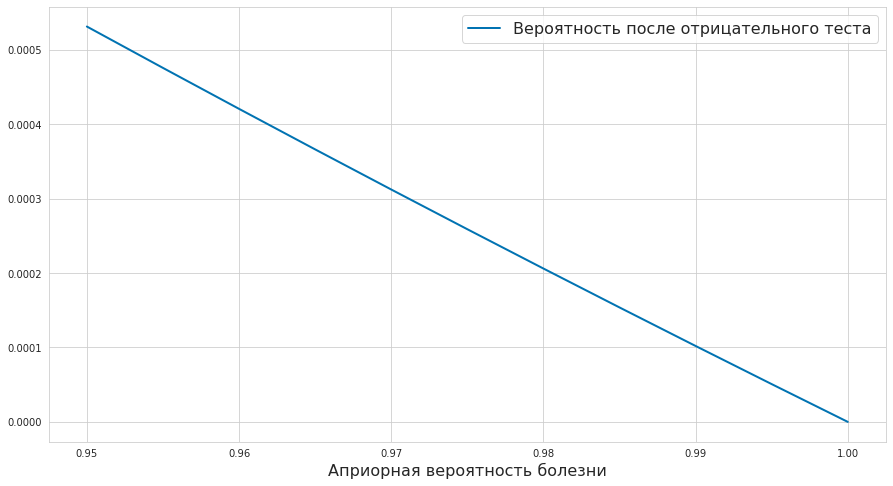

In [ ]:
def compute_posterior(data, prior_prob=0.01, test_success=0.95):
    if data == 1:
        return (prior_prob * test_success) / (prior_prob * test_success + (1-prior_prob) * (1-test_success))
    elif data == 0:
        return (prior_prob * (1-test_success)) / (prior_prob * (1-test_success) + (1-prior_prob) * test_success)
    else:
        return None

vector_posterior = np.vectorize(compute_posterior, excluded=['data', 'prior_prob'])
xs = np.arange(0.95, 1.005, 0.005)
ys_zero = vector_posterior(0, test_success=xs)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys_zero, linewidth=2, label='Вероятность после отрицательного теста')
# ax.set_xlim((0.0, 0.3))
ax.set_xlabel('Априорная вероятность болезни', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)
# fig.savefig('intro1.pdf', bbox_inches='tight')
plt.show()

Мне кажется, что врачами стоит сосредоточиться на снижении ложно отрицательных ответов, так как здесь идет линейная зависимость действительно оказаться здоровым с ростом качества теста. И за один и тот же прирост качества теста можно добиться большей точности, чем в случае с ложно положительными предсказаниями, где качество растет медленно экпоненциально. Ну и в жизни будет лучше если тест будет давать меньше ложно отрицательных ответов.